# A gentle Introduction to Neural networks

**Plan**:
0. What do we want to do here?
1. Logistic regression
2. Relu neural networks

## 1. What do we want to do here?
Focus on binary classification problem.

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
# see http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
import os, sys
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
src_p = os.path.join(os.getcwd(), os.pardir, os.pardir)
notebooks_dir = os.path.join(os.getcwd())
sys.path.append(src_dir)
sys.path.append(src_p)
sys.path.append(notebooks_dir)

In [4]:
import data
from data.generate_data import *

In [5]:
data = sample(distribution0,500,scale=10)

In [6]:
data.head()

,coordinates,traffic
0,50.452008,slow
1,35.808119,slow
2,79.843122,normal
3,30.791405,slow
4,23.184174,slow


In [7]:
x = data.coordinates
x = x.values.reshape(-1,1)
y = data.traffic.map({'normal':0,'slow':1})

In [10]:
data.head()

,coordinates,traffic
0,50.452008,slow
1,35.808119,slow
2,79.843122,normal
3,30.791405,slow
4,23.184174,slow


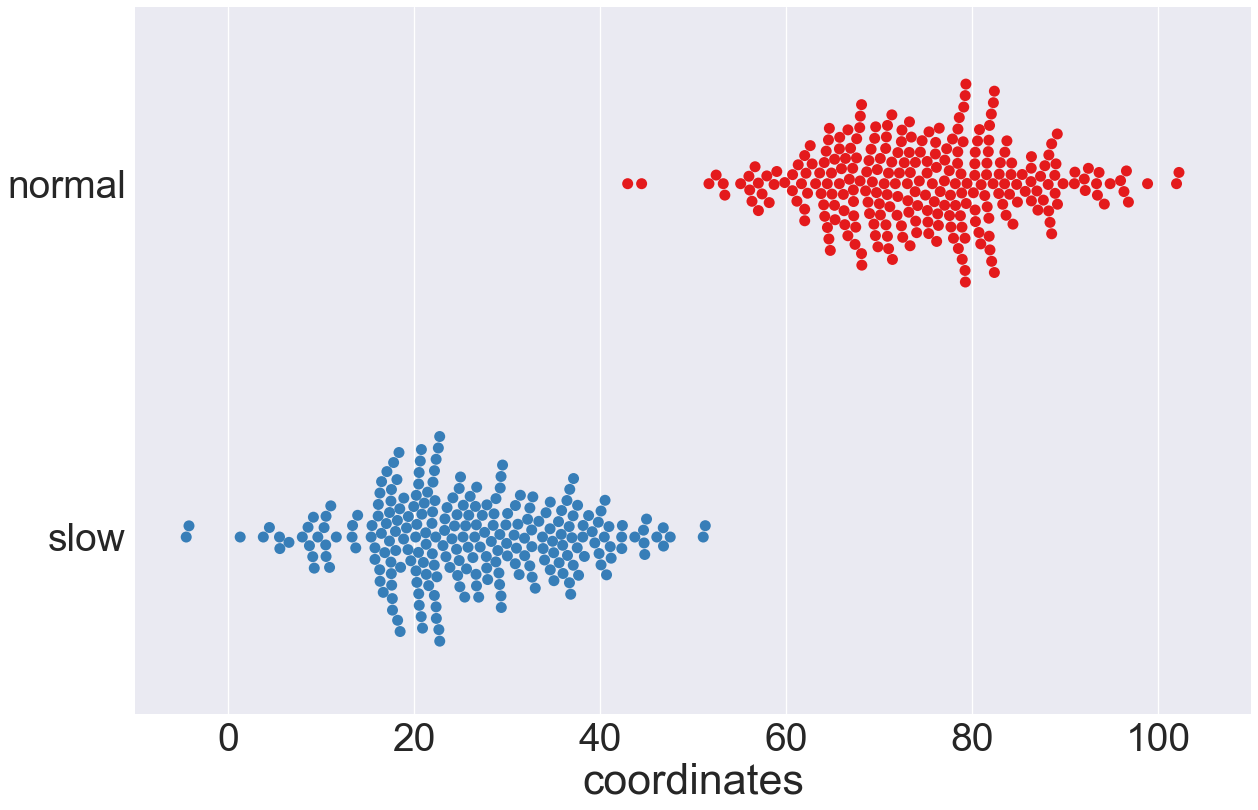

In [16]:
fig = plot_traffic(data,size_point=11)
ax = fig.gca()

In [17]:
def plot_new_point(num=1):
    for i in range(num):
        coordinate, traffic = distribution0()
        plt.plot([coordinate], [0.5], marker='o', markersize=20, color="black")

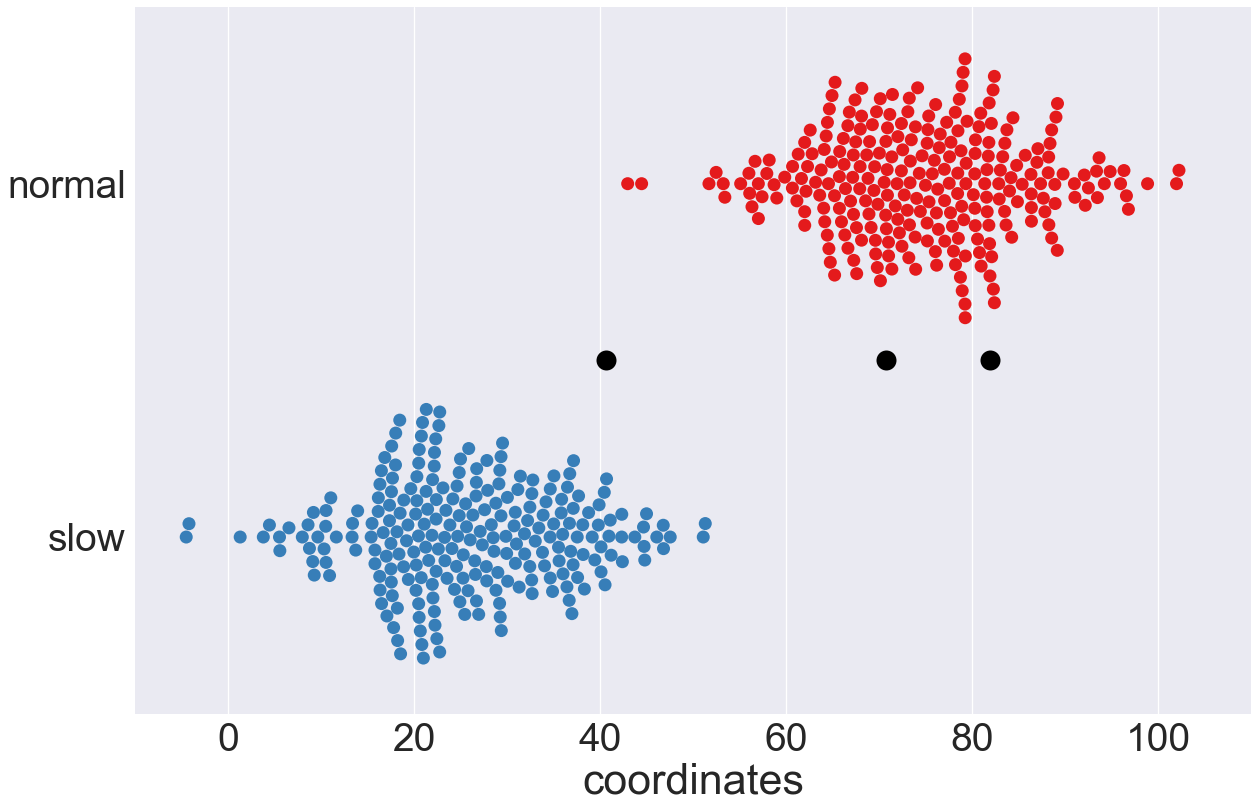

In [18]:
fig = plot_traffic(data,size_point=13)
plot_new_point(3)
#fig.gca().plot([50], [0], marker='o', markersize=3, color="black")

## The question we want to answer: Is the black point in a normal or in a slow traffic?

## 2. Logistic regression

In [19]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [20]:
logistic_clf = LogisticRegression()

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [22]:
logistic_clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
x_test.shape

(125, 1)

In [24]:
logistic_clf.score(x_test,y_test)

0.99199999999999999

In [26]:
interval = np.arange(0,100,0.1)

In [27]:
p_normal = logistic_clf.predict_proba(interval.reshape(-1,1))[:,1]

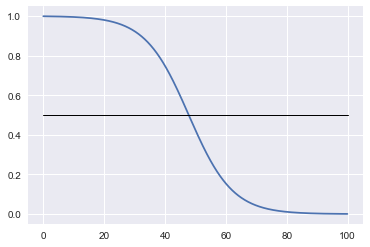

In [28]:
sns.set()
plt.figure()
plt.plot(interval,p_normal)
plt.plot([0,100],[0.5,0.5],c='black',linewidth=1)

Here the logistic regression algorithm does the following: try to find a function 
$$ P_{normal} : [0,100] \to [0,1]$$
such that for a random value of a coordinate $x \in [0,100]$,   

$ P_{normal}(x)$ is an estimate (= a guess) of the probability that the traffic is slow.

The idea of logistic regression is to look for a function of the form:
$$ P_{normal}(x) = \sigma(wx+b)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

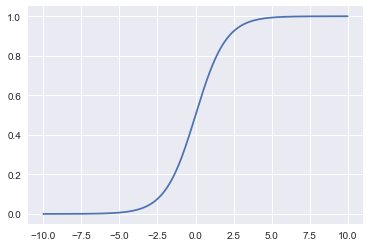

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x_sigmoid = np.arange(-10,10,0.01)
y_sigmoid = sigmoid(x_sigmoid)
plt.plot(x_sigmoid,y_sigmoid)

In [31]:
distribution = lambda : distribution0(20,-50,50)
data0 = raw_sample(distribution,100)

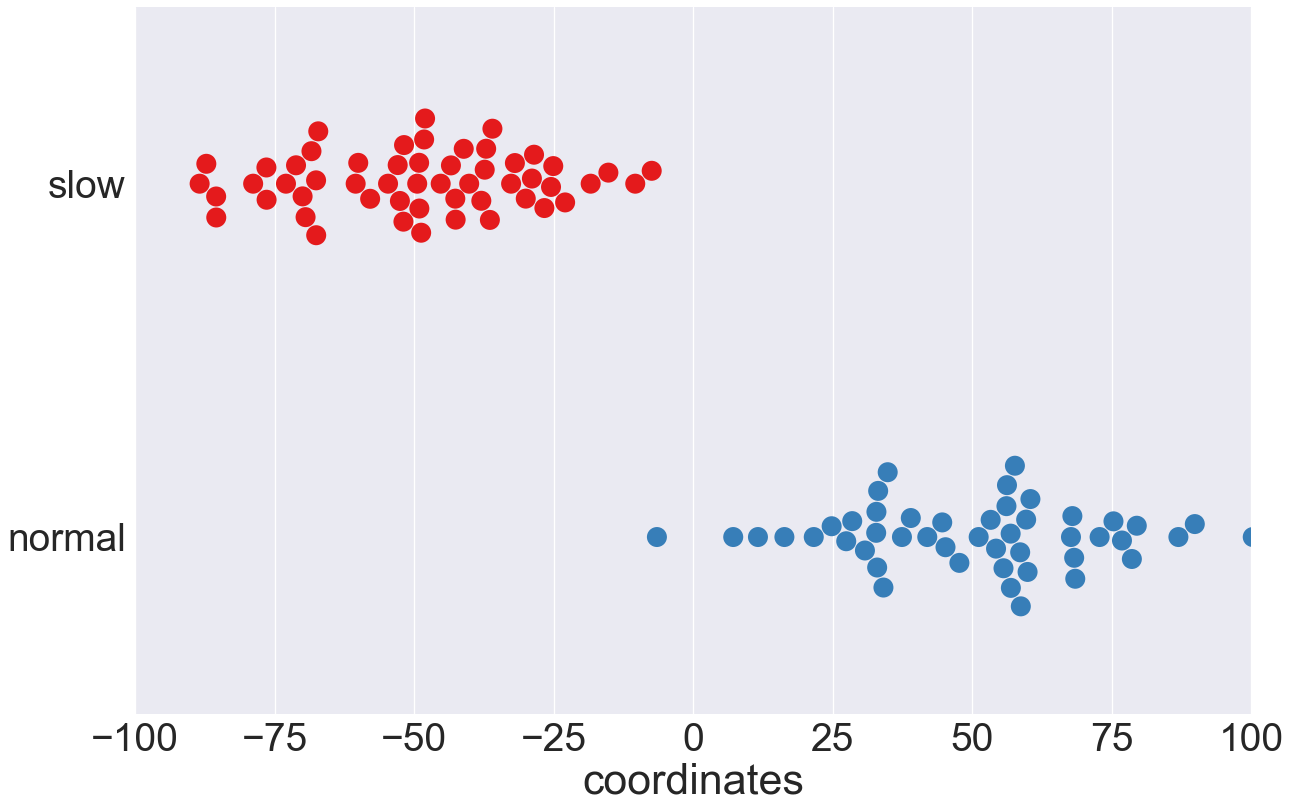

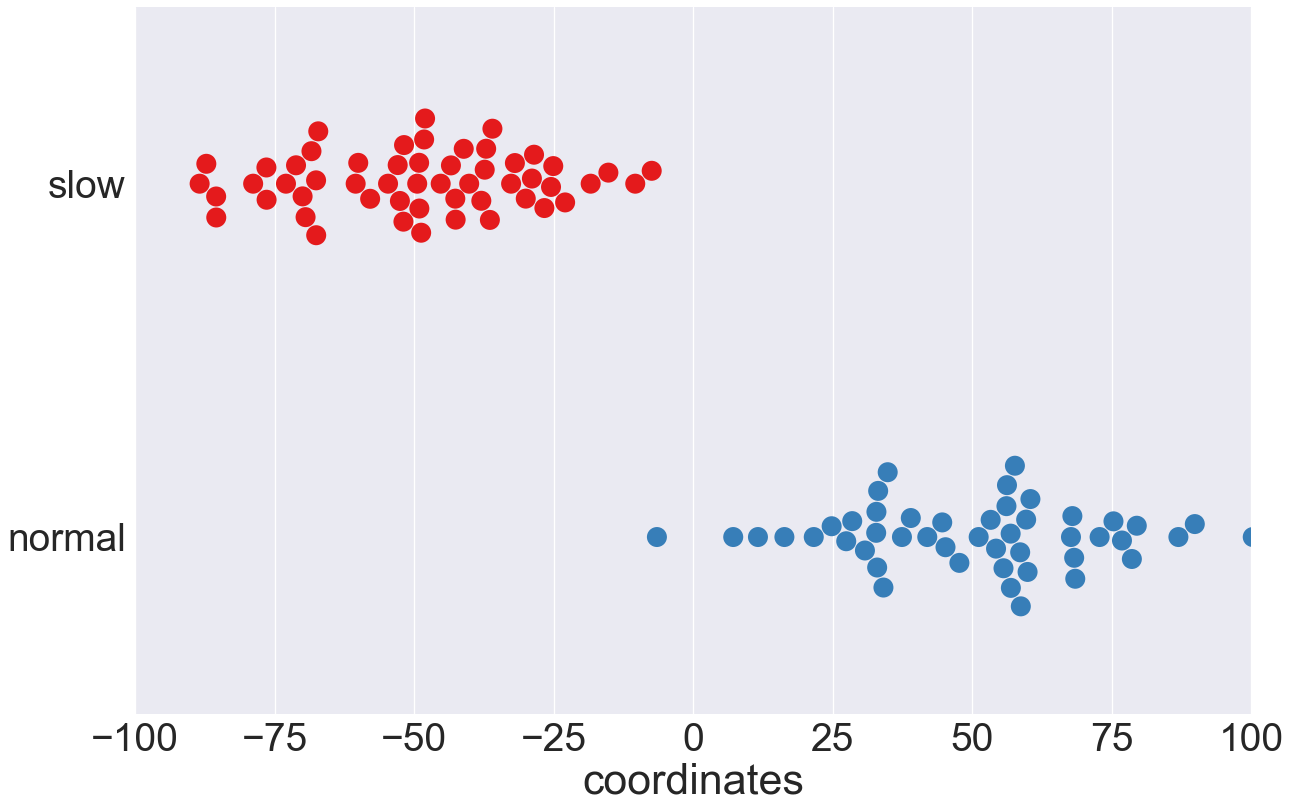

In [32]:
plot_traffic(data0,size_point=20,x_start=-100,x_end=100,)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Model

Using TensorFlow backend.


In [36]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.add(Activation('sigmoid'))

In [37]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
375/375 [==============================] - 0s 59us/step - loss: 8.0473 - acc: 0.4933
Epoch 2/100
375/375 [==============================] - 0s 65us/step - loss: 8.0473 - acc: 0.4933
Epoch 3/100
375/375 [==============================] - 0s 61us/step - loss: 8.0472 - acc: 0.4933
Epoch 4/100
375/375 [==============================] - 0s 61us/step - loss: 8.0472 - acc: 0.4933
Epoch 5/100
375/375 [==============================] - 0s 65us/step - loss: 8.0472 - acc: 0.4933
Epoch 6/100
375/375 [==============================] - 0s 62us/step - loss: 8.0472 - acc: 0.4933
Epoch 7/100
375/375 [==============================] - 0s 57us/step - loss: 8.0472 - acc: 0.4933
Epoch 8/100
375/375 [==============================] - 0s 57us/step - loss: 8.0472 - acc: 0.4933
Epoch 9/100
375/375 [==============================] - 0s 64us/step - loss: 8.0472 - acc: 0.4933
Epoch 10/100
375/375 [==============================] - 0s 67us/step - loss: 8.0471 - acc: 0.4933
Epoch 11/100
375/375 [=======